In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

df = pd.read_excel("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Decision Tree\\heart_disease.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [3]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [5]:
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [7]:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
            age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age             0
Age in years    0
dtype: int64


In [11]:
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

C:\Users\Ashish\AppData\Local\Temp\ipykernel_28308\522971400.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [13]:
# Check for numerical variables
numerical_columns = df.select_dtypes(include=['number']).columns
if len(numerical_columns) > 0:
    print("\nNumerical columns detected:", numerical_columns)
    # Plot histograms
    df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3))
    plt.suptitle("Histograms of Numerical Variables")
    plt.show()

    # Plot box plots
    df[numerical_columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), title="Box Plots of Numerical Variables")
    plt.show()

    # Plot correlation matrix
    corr_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
    plt.title("Correlation Matrix of Numerical Variables")
    plt.show()
else:
    print("\nNo numerical variables found in the dataset.")


No numerical variables found in the dataset.


In [15]:
# Check for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("\nCategorical columns detected:", categorical_columns)
    # Perform one-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    print("\nData after one-hot encoding:\n", df_encoded.head())
else:
    print("\nNo categorical variables found in the dataset.")


Categorical columns detected: Index(['age', 'Age in years'], dtype='object')

Data after one-hot encoding:
    age_chol  age_cp  age_exang  age_fbs  age_num  age_oldpeak  age_restecg  \
0         0       0          0        0        0            0            0   
1         0       1          0        0        0            0            0   
2         0       0          0        0        0            0            0   
3         1       0          0        0        0            0            0   
4         0       0          0        1        0            0            0   

   age_slope  age_thal  age_thalch  ...  \
0          0         0           0  ...   
1          0         0           0  ...   
2          0         0           0  ...   
3          0         0           0  ...   
4          0         0           0  ...   

   Age in years_Gender ; Male - 1, Female -0  \
0                                          1   
1                                          0   
2                  

In [17]:
# Handle missing values (if any)
df_encoded.fillna(df_encoded.mean(), inplace=True)

In [19]:
# Define features and target
# Check if 'target' column exists after one-hot encoding

# Get a list of all columns
all_columns = df_encoded.columns.tolist()

# Convert all column names to lowercase for case-insensitive search
all_columns_lower = [col.lower() for col in all_columns]

# Check if 'target' (case-insensitive) is in the columns
if 'target' in all_columns_lower:
    # Get the original case-sensitive column name
    target_col_index = all_columns_lower.index('target')
    target_col = all_columns[target_col_index]

    X = df_encoded.drop(target_col, axis=1)
    y = df_encoded[target_col]
else:
    # If 'target' doesn't exist, it was likely one-hot encoded
    # Find columns that might represent the target (case-insensitive)
    # You might need to adjust the search pattern based on your data
    target_cols = [col for col in all_columns if 'target' in col.lower()]

    # If potential target columns are found, use the first one as the target
    if target_cols:
        target_col = target_cols[0]
        X = df_encoded.drop(target_col, axis=1)
        y = df_encoded[target_col]
    else:
        raise KeyError("No column containing 'target' (case-insensitive) found in the dataset")

In [21]:
# Display the column names and the first few rows to confirm correct feature-target assignment
print("Features columns:", X.columns)
print("Target column:", target_col)
print("First few rows of the dataset:\n", df.head())

Features columns: Index(['age_chol', 'age_cp', 'age_exang', 'age_fbs', 'age_num', 'age_oldpeak',
       'age_restecg', 'age_slope', 'age_thal', 'age_thalch', 'age_trestbps',
       'Age in years_Chest pain type',
       'Age in years_Gender ; Male - 1, Female -0',
       'Age in years_Resting blood pressure',
       'Age in years_ST depression induced by exercise relative to rest',
       'Age in years_Thal', 'Age in years_cholesterol measure',
       'Age in years_ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria',
       'Age in years_exercise induced angina',
       'Age in years_maximum heart rate achieved',
       'Age in years_the slope of the peak exercise ST segment'],
      dtype='object')
Target column: Age in years_target [0=no heart disease; 1,2,3,4 = st

In [23]:
# Scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Decision Tree Classifier
# Check if the target variable is continuous and discretize it
if y.dtype != 'int' and y.dtype != 'object':
    # Example: Binning continuous target into 3 categories (adjust bins as needed)
    y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])
else:
    y_binned = y

# Update splitting with the binned target
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

In [29]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Predictions
y_pred = clf.predict(X_test)

In [33]:
# Model Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Accuracy Score: 1.0


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [35]:
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


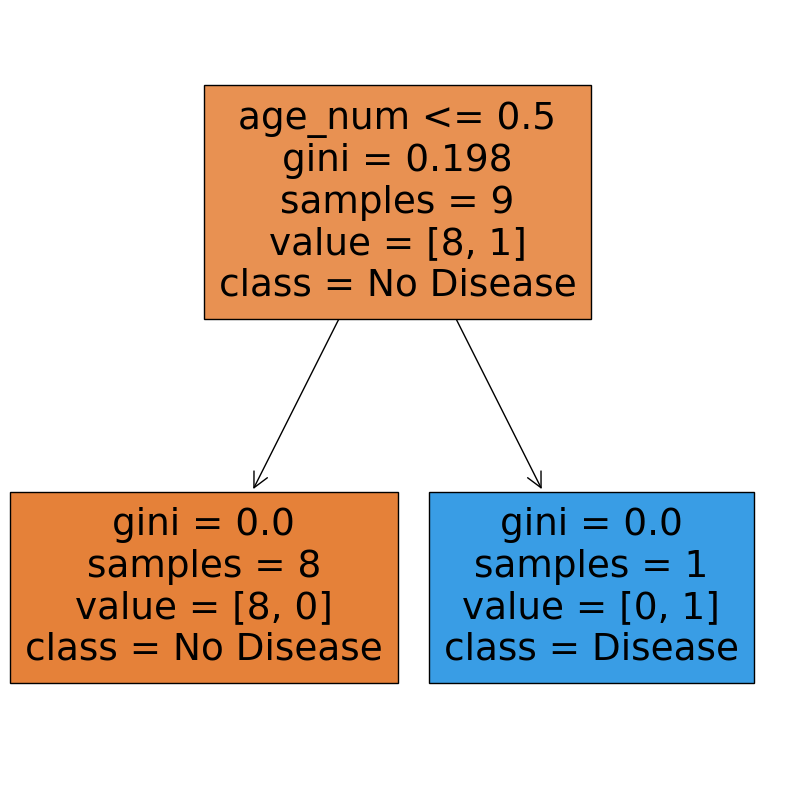

In [37]:
# Visualizing the decision tree
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Check if more than one class exists in the test set
if len(np.unique(y_test)) > 1:
    # Get predicted probabilities for all classes
    y_prob = clf.predict_proba(X_test)
    
    # Calculate ROC AUC score for multi-class using one-vs-rest approach
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    print(f"ROC-AUC (multi-class): {roc_auc:.2f}")
    
    # Plot ROC curve for each class
    for i in range(y_prob.shape[1]):  # Loop over each class
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
        plt.plot(fpr, tpr, label=f'Class {i} ROC curve (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
    plt.legend(loc='best')
    plt.show()

else:
    print("\nNot enough classes for ROC-AUC evaluation.")



Not enough classes for ROC-AUC evaluation.


In [42]:
# 5. Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [44]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [46]:

print("\nBest Parameters:\n", grid_search.best_params_)


Best Parameters:
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [48]:

print("\nOptimized Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))



Optimized Model Evaluation:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


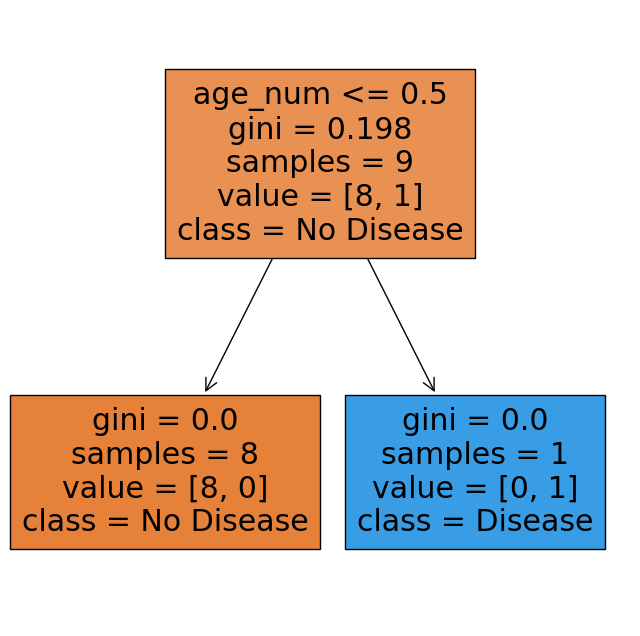

In [50]:
# Visualize the optimized decision tree
plt.figure(figsize=(8,8))
plot_tree(best_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

In [55]:
# For multi-class classification, no need to specify pos_label. Use 'average' to aggregate results.
print("\nOptimized Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision (macro):", precision_score(y_test, y_pred_best, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_best, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_best, average='macro'))

#Per-class performance:
print("\nPer-Class Performance:")
for label in np.unique(y_test):
    print(f"Class {label} - Precision: {precision_score(y_test, y_pred_best, pos_label=label)}")
    print(f"Class {label} - Recall: {recall_score(y_test, y_pred_best, pos_label=label)}")
    print(f"Class {label} - F1 Score: {f1_score(y_test, y_pred_best, pos_label=label)}")



Optimized Model Evaluation:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Per-Class Performance:
Class 0 - Precision: 1.0
Class 0 - Recall: 1.0
Class 0 - F1 Score: 1.0


In [ ]:
#Interview Questions

In [ ]:
#1)What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Answer:

Common hyperparameters for decision tree models include:

Max Depth: Tree depth is limited by max_depth to avoid overfitting; shallow trees may underfit, while deeper trees may overfit.Higher values simplify the model, while lower values make it more complex. 
min_samples_split: Minimum samples needed to split a node. Higher values avoid overfitting by guaranteeing adequate data at leaves. 
min_samples_leaf: Minimum samples needed at a leaf node.
max_features: The maximum number of features that should be taken into account when splitting; fewer features may result in underfitting but less overfitting.
criterion: Assesses split quality, with the following options:
Gini: The default Gini impurity.
Entropy: Gaining knowledge.
max_leaf_nodes: Prevents excessive tree development by limiting the number of leaf nodes.
splitter: A method for determining which feature is appropriate to split; possibilities include:
    best: The best attribute.
    random: A feature that is random.

These hyperparameters control the model's complexity, balancing bias and variance to improve performance.

In [ ]:
#2)What is the difference between the Label encoding and One-hot encoding?

Answer:

Label encoding:

Transforms every category in a categorical feature into an integer value.
For instance, label encoding would assign values {'Red': 0, 'Green': 1, 'Blue': 2} to a feature Color = ['Red', 'Green', 'Blue'].
Pros: For features with ordinal relationships—where the categories have a meaningful order—the advantages are straightforward and effective.
Cons: When there is no such ordering, the implicit ordinal relationship introduced (for example, Green = 1 is "between" Red = 0 and Blue = 2) could confuse models.

One-hot encoding:

Each category is given its own column when it is converted into a binary (0/1) vector.
Pros: It is  helpful when there is no ordinal link between nominal (categorical) features. It does not introduce any erroneous ordering.
Cons: If there are a lot of categories, there may be a lot of columns, which could result in high-dimensional data and possibly slower model performance.

One-hot encoding is used for nominal data, where the categories have no discernible order,
whereas label encoding works better for ordinal data, where the order of the categories is important.

In [ ]:
#-----------------------------------FINISH--------------------------------!